In [356]:
import pandas as pd
import numpy as np
import re
import math
from pathlib import Path
from typing import Tuple
from collections import Counter

The first exercise here is to extract the data from [GenTB](https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-021-00953-4) that was **not** used in the WHO catalogue generation.

In [2]:
run_re = re.compile(r"(E|D|S)RR[0-9]{6,}")
exp_re = re.compile(r"(E|D|S)RX[0-9]{6,}")
sample_re = re.compile(r"(E|D|S)RS[0-9]{6,}")
biosample_re = re.compile(r"SAM(E|D|N)[A-Z]?[0-9]+")

In [3]:
gentb_sheet = "../../docs/gentb-samplesheet.csv"
who_sheet = "../../docs/who-samplesheet.csv"

In [4]:
gentbdf = pd.read_csv(gentb_sheet)
gentbdf.set_index("run_accession", inplace=True)
gentbdf = gentbdf[~gentbdf.index.duplicated(keep='first')]
whodf = pd.read_csv(who_sheet)

In [5]:
len(gentbdf)

18425

In [6]:
len(whodf)

38223

In [7]:
gentbdf.columns

Index(['bioproject', 'biosample', 'amikacin', 'capreomycin', 'ciprofloxacin',
       'ethambutol', 'ethionamide', 'isoniazid', 'kanamycin', 'levofloxacin',
       'moxifloxacin', 'ofloxacin', 'para-aminosalicylic_acid', 'pyrazinamide',
       'rifampicin', 'streptomycin'],
      dtype='object')

In [8]:
whodf.columns

Index(['ena_project', 'ena_sample', 'ena_experiment', 'ena_run'], dtype='object')

In [9]:
gentb_accs = []
with open(gentb_sheet) as fp:
    _ = next(fp)
    for line in fp:
        if m := run_re.search(line):
            run = m.group()
        else:
            run = None
        if m:= exp_re.search(line):
            exp = m.group()
        else:
            exp = None
        if m := sample_re.search(line):
            sample = m.group()
        else:
            sample = None
        if m := biosample_re.search(line):
            biosample = m.group()
        else:
            biosample = None
        gentb_accs.append((run, exp, sample, biosample))

In [10]:
gentb_accs

[('SRR7439415', None, None, 'SAMN09492287'),
 ('SRR7131298', None, None, 'SAMN09090624'),
 ('SRR7131297', None, None, 'SAMN09090623'),
 ('SRR7131296', None, None, 'SAMN09090622'),
 ('SRR7131295', None, None, 'SAMN09090621'),
 ('SRR7131294', None, None, 'SAMN09090620'),
 ('SRR7131293', None, None, 'SAMN09090619'),
 ('SRR7131292', None, None, 'SAMN09090618'),
 ('SRR7131291', None, None, 'SAMN09090515'),
 ('SRR7131290', None, None, 'SAMN09090514'),
 ('SRR7131289', None, None, 'SAMN09090513'),
 ('SRR7131288', None, None, 'SAMN09090512'),
 ('SRR7131287', None, None, 'SAMN09090511'),
 ('SRR7131286', None, None, 'SAMN09090510'),
 ('SRR7131285', None, None, 'SAMN09090509'),
 ('SRR7131284', None, None, 'SAMN09090508'),
 ('SRR7131283', None, None, 'SAMN09090579'),
 ('SRR7131282', None, None, 'SAMN09090429'),
 ('SRR7131281', None, None, 'SAMN09090413'),
 ('SRR7131280', None, None, 'SAMN09090517'),
 ('SRR7131279', None, None, 'SAMN09090516'),
 ('SRR7131277', None, None, 'SAMN09090409'),
 ('SRR7131

In [11]:
who_accs = []
with open(who_sheet) as fp:
    _ = next(fp)
    for line in fp:
        if m := run_re.search(line):
            run = m.group()
        else:
            run = None
        if m:= exp_re.search(line):
            exp = m.group()
        else:
            exp = None
        if m := sample_re.search(line):
            sample = m.group()
        else:
            sample = None
        if m := biosample_re.search(line):
            biosample = m.group()
        else:
            biosample = None
        accs = (run, exp, sample, biosample)
        if all(x is None for x in accs):
            continue
        else:
            who_accs.append(accs)

In [12]:
len(gentb_accs)

18612

In [13]:
len(who_accs)

35811

In [14]:
who_accs

[('ERR2516949', 'ERX2536164', 'ERS2401626', None),
 ('ERR2516943', 'ERX2536158', 'ERS2401620', None),
 ('ERR2517010', 'ERX2536225', 'ERS2401687', None),
 ('ERR2516824', 'ERX2536039', 'ERS2401501', None),
 ('ERR2516841', 'ERX2536056', 'ERS2401518', None),
 ('ERR2517030', 'ERX2536245', 'ERS2401707', None),
 ('ERR2517047', 'ERX2536262', 'ERS2401724', None),
 ('ERR2517067', 'ERX2536282', 'ERS2401744', None),
 ('ERR2516781', 'ERX2535996', 'ERS2401458', None),
 ('ERR2517086', 'ERX2536301', 'ERS2401763', None),
 ('ERR2516802', 'ERX2536017', 'ERS2401479', None),
 ('ERR2516847', 'ERX2536062', 'ERS2401524', None),
 ('ERR2516913', 'ERX2536128', 'ERS2401590', None),
 ('ERR2516850', 'ERX2536065', 'ERS2401527', None),
 ('ERR2517057', 'ERX2536272', 'ERS2401734', None),
 ('ERR2516942', 'ERX2536157', 'ERS2401619', None),
 ('ERR2516823', 'ERX2536038', 'ERS2401500', None),
 ('ERR2516796', 'ERX2536011', 'ERS2401473', None),
 ('ERR2516814', 'ERX2536029', 'ERS2401491', None),
 ('ERR2516782', 'ERX2535997', '

In [15]:
who_runs = {t[0] for t in who_accs if t[0] is not None}
who_exps = {t[1] for t in who_accs if t[1] is not None}
who_samps = {t[2] for t in who_accs if t[2] is not None}
who_bios = {t[3] for t in who_accs if t[3] is not None}

In [16]:
non_who_accs = []
for r,e,s,b in gentb_accs:
    if r is not None and r in who_runs:
        continue
    if e is not None and e in who_exps:
        continue
    if s is not None and s in who_samps:
        continue
    if b is not None and b in who_bios:
        continue
    non_who_accs.append((r, e, s, b))

In [17]:
len(non_who_accs)

4860

In [18]:
non_who_runs = list({t[0] for t in non_who_accs})
non_who_df = gentbdf.loc[non_who_runs]
non_who_df.index.rename('run', inplace=True)
non_who_df

,bioproject,biosample,amikacin,capreomycin,ciprofloxacin,ethambutol,ethionamide,isoniazid,kanamycin,levofloxacin,moxifloxacin,ofloxacin,para-aminosalicylic_acid,pyrazinamide,rifampicin,streptomycin
run,,,,,,,,,,,,,,,,
SRR1723955,PRJNA268900,SAMN03246666,NaN,NaN,NaN,R,NaN,R,S,NaN,NaN,S,NaN,NaN,R,R
SRR6855945,PRJNA428596,SAMN08732394,S,S,NaN,NaN,NaN,S,S,NaN,S,S,NaN,S,S,NaN
SRR6855879,PRJNA428596,SAMN08732593,S,S,NaN,NaN,NaN,S,S,NaN,S,S,NaN,S,S,NaN
ERR181713,PRJEB2794,SAMEA1556878,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN
ERR126624,PRJEB2794,SAMEA1465978,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6936732,PRJNA428596,SAMN08862856,S,S,NaN,NaN,NaN,R,S,NaN,S,S,NaN,R,S,NaN
ERR221529,PRJEB2794,SAMEA1688701,NaN,NaN,NaN,S,NaN,S,NaN,NaN,NaN,NaN,NaN,S,S,S
ERR1034969,PRJEB10385,SAMEA3558502,S,NaN,NaN,S,S,R,NaN,NaN,NaN,S,NaN,NaN,R,NaN


Gathering Delamanid (DLM) phenotypes from https://journals.asm.org/doi/full/10.1128/JCM.01304-20

They used a critical concentraction of >0.06 μg/ml - based on the [WHO technical guidelines](https://apps.who.int/iris/bitstream/handle/10665/260470/WHO-CDS-TB-2018.5-eng.pdf).

MICs and accessions where taken from the supplementary Excel spreadsheet https://journals.asm.org/doi/suppl/10.1128/JCM.01304-20/suppl_file/jcm.01304-20-sd004.xlsx

In [19]:
dlm_mics = pd.read_csv("../../docs/dlm-mics.csv")
DLM_CC = 0.06  # delamanid critical concentration

In [20]:
dlm_mics

,ISOLATE 1 DLM MIC (ug/ml),ISOLATE 2 DLM MIC (ug/ml),DRS Sample selected (Isolate 1),DRS Sample selected (Isolate 2)
0,NaN,NaN,TRL0018311,TRL0020517
1,≤0.004,NaN,TRL0084025,NaN
2,0.03,NaN,132321,NaN
3,0.008,NaN,TRL0029765,TRL0050938
4,0.015,NaN,3617-13,NaN
...,...,...,...,...
158,0.03,NaN,140129,131110
159,0.5,NaN,BF01311702,BF01330971
160,0.25,NaN,BF01457875,NaN
161,0.015,NaN,3635-13,NaN


In [21]:
isolate1 = list(zip(dlm_mics.iloc[:,0], dlm_mics.iloc[:,2]))
isolate2 = list(zip(dlm_mics.iloc[:,1], dlm_mics.iloc[:,3]))

In [22]:
dlm_mic_df = pd.DataFrame(isolate1+isolate2, columns=["MIC", "isolate"]).dropna()
dlm_mic_df.set_index("isolate", verify_integrity=True, inplace=True)

In [23]:
dlm_mic_df

,MIC
isolate,
TRL0084025,≤0.004
132321,0.03
TRL0029765,0.008
3617-13,0.015
132348,2
...,...
131140,0.015
140162,1
132756,0.015


Convert all columns with a greater/less symbol into a single value

In [24]:
def isfloat(s: str) -> bool:
    try:
        f = float(s)
        return True
    except ValueError:
        return False

LEQ = "≤"
GT = ">"

def convert_op(s: str) -> float:
    """Convert a string with a > or < into a value just below or above it"""
    if s.startswith(LEQ):
        return float(s[1:].strip())
    elif s.startswith(GT):
        f = float(s[1:].strip()) + 0.00001
        return math.ceil(f)
    else:
        raise ValueError(f"Don't know how to handle {s}")

In [25]:
dlm_pheno = []
for f in dlm_mic_df["MIC"]:
    if not isfloat(f):
        mic = convert_op(f)
    else:
        mic = float(f)
    p = "R" if mic > DLM_CC else "S"
    dlm_pheno.append(p)

In [26]:
sum(1 for p in dlm_pheno if p == "R")

39

In [27]:
dlm_mic_df["delamanid"] = dlm_pheno

In [28]:
dlm_mic_df

,MIC,delamanid
isolate,,
TRL0084025,≤0.004,S
132321,0.03,S
TRL0029765,0.008,S
3617-13,0.015,S
132348,2,R
...,...,...
131140,0.015,S
140162,1,R
132756,0.015,S


In [29]:
dlm_accs_df = pd.read_csv("../../docs/dlm-samplesheet.csv")
dlm_accs_df.set_index("SampleID", verify_integrity=True, inplace=True)

In [30]:
# this adds the delamanid phenotypes to the appropriate samples
dlm_df = dlm_mic_df.join(dlm_accs_df, how='outer')

In [31]:
dlm_df.index.rename("isolate", inplace=True)

In [32]:
dlm_df = dlm_df.reset_index().set_index("RUN", verify_integrity=True)
dlm_df.index.rename("run", inplace=True)

In [33]:
dlm_df

,isolate,MIC,delamanid,Country,RIF,INH,OFX (2),MFX (0.5),MFX (2),LFX (15),GFX (2),KAN,AMK,CAP,PZA
run,,,,,,,,,,,,,,,
SRR6831721,1-1307,NaN,NaN,Ukraine,S,S,S,S,S,NaN,NaN,S,S,S,S
SRR6831720,1-1521,NaN,NaN,Ukraine,S,S,S,S,S,NaN,NaN,S,S,S,S
SRR6831719,1-2543,NaN,NaN,Ukraine,R,R,R,R,S,NaN,NaN,R,R,R,R
SRR6832237,1-3925,NaN,NaN,Ukraine,S,S,S,NaN,NaN,NaN,NaN,S,S,S,NaN
SRR6832228,1-4043,NaN,NaN,Ukraine,R,R,S,S,S,NaN,NaN,S,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6982117,dg00676352,NaN,NaN,SouthAfrica,R,S,S,S,S,NaN,NaN,S,S,S,S
SRR6982312,dh00727632,NaN,NaN,SouthAfrica,S,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR6982311,dh00742746,NaN,NaN,SouthAfrica,S,S,S,S,S,NaN,NaN,S,S,S,S


In [34]:
dlm_df.index.intersection(who_runs)

Index([], dtype='object', name='run')

Therefore, it looks like all of the samples with DLM phenotypes are not in the WHO set.

There are two MFX critical concentrations in this dataset. My understanding from the reference they sited for CCs (https://doi.org/10.1016/S1473-3099(18)30073-2) is that the 0.5 one if the appropriate one to use. This is also backed up the [WHO guidelines](https://apps.who.int/iris/rest/bitstreams/1098393/retrieve) (page 2 Table 1).

In [35]:
# delete rows based on inverse of column values
drop_cols = ["MIC", "isolate", "Country", "MFX (2)"]
dlm_df.drop(columns=drop_cols, inplace=True)

In [36]:
dlm_df.columns

Index(['delamanid', 'RIF', 'INH', 'OFX (2)', 'MFX (0.5)', 'LFX (15)',
       'GFX (2)', 'KAN', 'AMK', 'CAP', 'PZA'],
      dtype='object')

In [37]:
non_who_df.columns

Index(['bioproject', 'biosample', 'amikacin', 'capreomycin', 'ciprofloxacin',
       'ethambutol', 'ethionamide', 'isoniazid', 'kanamycin', 'levofloxacin',
       'moxifloxacin', 'ofloxacin', 'para-aminosalicylic_acid', 'pyrazinamide',
       'rifampicin', 'streptomycin'],
      dtype='object')

In [38]:
#rename the drug abbreviations
abbrev_to_name = {
    "RIF": "rifampicin",
    "INH": "isoniazid",
    "OFX (2)": "ofloxacin",
    "OFX": "ofloxacin",
    "MFX (0.5)": "moxifloxacin",
    "MFX": "moxifloxacin",
    "MOX": "moxifloxacin",
    "LFX (15)": "levofloxacin",
    "GFX (2)": "gatifloxacin",
    "KAN": "kanamycin",
    "KM": "kanamycin",
    "AMK": "amikacin",
    "CAP": "capreomycin",
    "PZA": "pyrazinamide",
    "DLM": "delamanid",
    "DEL": "delamanid",
    "LNZ": "linezolid",
    "LZD": "linezolid",
    "PAS": "para-aminosalicylic_acid",
    "EMB": "ethambutol",
    "SM": "streptomycin",
    "CS": "cycloserine",
    "BDQ": "bedaquiline",
    "CPM": "capreomycin",
    "ETO": "ethionamide",
    "CFZ": "clofazimine"
}
dlm_df.rename(columns=abbrev_to_name, inplace=True)

Solution here is taken from https://stackoverflow.com/q/71745028/5299417

What we do here is merge the dlm dataset with the non-WHO dataset and change the phenotype to NaN (i.e. None) if the two phenotypes listed in the two datasets disagree. In addition, if one dataset has an empty value we use the other if it is non-empty.

In [39]:
def comp(c1, c2):
    if pd.isna(c1):
        return c2
    elif pd.isna(c2):
        return c1
    elif c1 != c2:
        return np.nan
    else:
        return c1
    
combine_func = lambda s1, s2: np.array([comp(c1, c2) for c1, c2 in zip(s1,s2)])

In [40]:
non_who_df = non_who_df.combine(dlm_df, func=combine_func, overwrite=False)

Add the data from the head to head paper https://doi.org/10.1101/2022.03.04.22271870

The samplesheet is downloaded from figshare https://doi.org/10.6084/m9.figshare.19304648

In [41]:
csv_url = "https://figshare.com/ndownloader/files/34302611"
h2h_df = pd.read_csv(csv_url)

In [42]:
# use the first accession where there are multiple
h2h_df["illumina_run_accession"] = [r.split(";")[0] for r in h2h_df["illumina_run_accession"]]

In [43]:
h2h_df.set_index("illumina_run_accession", verify_integrity=True, inplace=True)

In [44]:
h2h_df.index.rename("run", inplace=True)

In [45]:
h2h_df.index.intersection(who_runs)

Index(['ERR4817065', 'ERR4816407', 'ERR4821577'], dtype='object', name='run')

So we need to remove these 3 isolates from the dataset

In [46]:
h2h_df = h2h_df.loc[h2h_df.index.difference(who_runs)]

In [47]:
h2h_df

,sample,site,matched,pacbio,excluded,failed_qc,run,barcode,barcode_kit,collection_date,lineage,nanopore_run_accession,pacbio_run_accession,sample_accession,biosample_accession,assembly_accession
run,,,,,,,,,,,,,,,,
ERR4814410,18_0622465,birmingham,1,0,0,0,birmingham-mgit-run4,10,EXP-NBD103,2018,2.2,ERR9030543,NaN,ERS10792344,SAMEA13188807,NaN
ERR4814811,18_0622363,birmingham,1,0,0,0,birmingham-mgit-run3,3,EXP-NBD103,2018,3.1.2.2,ERR9030493,NaN,ERS10792337,SAMEA13188800,NaN
ERR4814915,18_0622267,birmingham,1,0,0,0,birmingham-mgit-run6,2,EXP-NBD103,2018,4,ERR9030322,NaN,ERS10792333,SAMEA13188796,NaN
ERR4815143,18_0622446,birmingham,1,0,0,0,birmingham-mgit-run5,2,EXP-NBD103,2018,4.2.2,ERR9030423,NaN,ERS10792341,SAMEA13188804,NaN
ERR4815412,18_0622300,birmingham,1,0,0,0,birmingham-mgit-run6,4,EXP-NBD103,2018,1.2.2,ERR9030370,NaN,ERS10792335,SAMEA13188798,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR9030534,mada_1-54,madagascar,1,0,0,0,madagascar_tb_mdr_4,4,EXP-NBD103,22/4/2015,1.1.2,ERR9030367,NaN,ERS10792281,SAMEA13188744,NaN
ERR9030535,mada_123,madagascar,1,0,0,0,madagscar_tb_aug_3,6,EXP-NBD103,2/5/2016,4.1,ERR9030249,NaN,ERS10792239,SAMEA13188702,NaN
ERR9030539,mada_132,madagascar,1,1,0,0,madagscar_tb_aug_4,5,EXP-NBD103,2/2/2017,4.1,ERR9030258,ERR9030503,ERS10792226,SAMEA13188689,ERZ5737209


Load the phenotype information

In [48]:
url = "https://raw.githubusercontent.com/mbhall88/head_to_head_pipeline/3ed818c9f3754612a33060428ee651cd0f91234b/docs/phenotypes.csv"
h2h_pheno = pd.read_csv(url, index_col="sample")

In [49]:
h2h_df.index.rename("illumina_run_accession", inplace=True)
h2h_df = h2h_df.reset_index().set_index("sample")

In [50]:
h2h_df

,illumina_run_accession,site,matched,pacbio,excluded,failed_qc,run,barcode,barcode_kit,collection_date,lineage,nanopore_run_accession,pacbio_run_accession,sample_accession,biosample_accession,assembly_accession
sample,,,,,,,,,,,,,,,,
18_0622465,ERR4814410,birmingham,1,0,0,0,birmingham-mgit-run4,10,EXP-NBD103,2018,2.2,ERR9030543,NaN,ERS10792344,SAMEA13188807,NaN
18_0622363,ERR4814811,birmingham,1,0,0,0,birmingham-mgit-run3,3,EXP-NBD103,2018,3.1.2.2,ERR9030493,NaN,ERS10792337,SAMEA13188800,NaN
18_0622267,ERR4814915,birmingham,1,0,0,0,birmingham-mgit-run6,2,EXP-NBD103,2018,4,ERR9030322,NaN,ERS10792333,SAMEA13188796,NaN
18_0622446,ERR4815143,birmingham,1,0,0,0,birmingham-mgit-run5,2,EXP-NBD103,2018,4.2.2,ERR9030423,NaN,ERS10792341,SAMEA13188804,NaN
18_0622300,ERR4815412,birmingham,1,0,0,0,birmingham-mgit-run6,4,EXP-NBD103,2018,1.2.2,ERR9030370,NaN,ERS10792335,SAMEA13188798,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mada_1-54,ERR9030534,madagascar,1,0,0,0,madagascar_tb_mdr_4,4,EXP-NBD103,22/4/2015,1.1.2,ERR9030367,NaN,ERS10792281,SAMEA13188744,NaN
mada_123,ERR9030535,madagascar,1,0,0,0,madagscar_tb_aug_3,6,EXP-NBD103,2/5/2016,4.1,ERR9030249,NaN,ERS10792239,SAMEA13188702,NaN
mada_132,ERR9030539,madagascar,1,1,0,0,madagscar_tb_aug_4,5,EXP-NBD103,2/2/2017,4.1,ERR9030258,ERR9030503,ERS10792226,SAMEA13188689,ERZ5737209


In [51]:
# drop the LPA phenotypes
drop_cols = [c for c in h2h_pheno.columns if c.endswith("-lpa")]
h2h_pheno.drop(columns=drop_cols, inplace=True)

In [52]:
# some phenos have ND
h2h_pheno.replace("ND", np.nan, inplace=True)

In [53]:
h2h_pheno

,streptomycin,isoniazid,rifampicin,ethambutol,pas,thioacetazone,moxifloxacin,ofloxacin,amikacin,kanamycin,capreomycin,pyrazinamide,ethionamide
sample,,,,,,,,,,,,,
mada_101,S,S,S,S,S,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mada_102,S,S,S,S,S,R,NaN,S,S,S,S,NaN,NaN
mada_103,S,S,S,S,S,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mada_104,S,R,S,S,S,R,NaN,S,S,S,S,NaN,NaN
mada_105,S,R,S,S,S,R,NaN,S,S,S,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
R36431,NaN,S,S,S,S,NaN,S,NaN,S,S,S,S,R
R36440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R37259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,R,NaN,NaN,NaN,NaN


In [54]:
# drop all but the illumina run accessions
h2h_df = h2h_df.loc[:,["illumina_run_accession", "biosample_accession"]]

In [55]:
h2h_df = h2h_pheno.join(h2h_df, how="inner")

In [56]:
h2h_df.rename(columns={"pas": "para-aminosalicylic_acid", "illumina_run_accession": "run", "biosample_accession": "biosample"}, inplace=True)

In [57]:
h2h_df.set_index("run", inplace=True)

In [58]:
h2h_df

,streptomycin,isoniazid,rifampicin,ethambutol,para-aminosalicylic_acid,thioacetazone,moxifloxacin,ofloxacin,amikacin,kanamycin,capreomycin,pyrazinamide,ethionamide,biosample
run,,,,,,,,,,,,,,
ERR9030447,NaN,S,NaN,NaN,NaN,NaN,NaN,S,S,NaN,NaN,NaN,S,SAMEA13188786
ERR9030388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,R,NaN,NaN,NaN,R,SAMEA13188759
ERR9030270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,S,NaN,NaN,NaN,S,SAMEA13188777
ERR5987402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,NaN,NaN,NaN,S,SAMEA13188782
ERR6362259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,S,NaN,NaN,NaN,S,SAMEA13188767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR9030436,S,R,R,R,S,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA13188675
ERR9030298,S,R,R,S,S,R,NaN,S,S,S,S,NaN,NaN,SAMEA13188703
ERR9030308,S,R,R,S,NaN,NaN,NaN,S,S,S,S,NaN,NaN,SAMEA13188691


In [59]:
non_who_df = non_who_df.combine(h2h_df, func=combine_func, overwrite=False)

Incorporating the data from [Huang *et al.*](https://doi.org/10.1093/cid/ciy883) - which has linezolid (LNZ) phenotypes - amongst others.

In [60]:
huang_pheno = pd.read_csv("../../docs/huang-samplesheet.csv")

In [61]:
huang_pheno = huang_pheno.rename(columns=abbrev_to_name).drop(columns=["H1"]).set_index("sampleID", verify_integrity=True)

In [62]:
huang_pheno

,isoniazid,rifampicin,ethambutol,streptomycin,pyrazinamide,kanamycin,ethionamide,moxifloxacin,ofloxacin,clofazimine,linezolid,cycloserine,amikacin,capreomycin,para-aminosalicylic_acid,bedaquiline,delamanid
sampleID,,,,,,,,,,,,,,,,,
1106,R,R,R,R,S,S,S,R,R,S,S,S,S,S,S,S,S
1124,R,R,S,R,S,S,S,S,S,S,S,R,S,S,S,S,S
1135,R,R,R,R,S,S,S,S,S,S,S,S,R,S,S,S,S
1161,R,R,S,R,S,S,S,S,S,S,S,S,S,S,S,S,S
2115,R,R,R,R,S,S,S,S,S,S,S,R,S,S,R,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28107,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
28117,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
29101,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S


In [63]:
huang_acc_df = pd.read_csv("../../docs/PRJNA436454-huang.tsv", sep="\t")

In [64]:
huang_acc_df["sample_title"] = [int(s.split("_")[-1]) for s in huang_acc_df["sample_title"]]

In [65]:
keep_cols = ["bioproject", "biosample", "run", "sampleID"]
huang_acc_df = huang_acc_df.rename(columns={"sample_title": "sampleID", "study_accession": "bioproject", "sample_accession": "biosample", "run_accession": "run"}).loc[:,keep_cols].set_index("sampleID")

In [66]:
huang_acc_df = huang_acc_df.combine_first(huang_pheno).set_index("run", verify_integrity=True)

In [67]:
huang_acc_df.index.intersection(who_runs)

Index([], dtype='object', name='run')

In [68]:
non_who_df = non_who_df.combine(huang_acc_df, func=combine_func, overwrite=False)

In [69]:
non_who_df

,amikacin,bedaquiline,bioproject,biosample,capreomycin,ciprofloxacin,clofazimine,cycloserine,delamanid,ethambutol,...,kanamycin,levofloxacin,linezolid,moxifloxacin,ofloxacin,para-aminosalicylic_acid,pyrazinamide,rifampicin,streptomycin,thioacetazone
run,,,,,,,,,,,,,,,,,,,,,
ERR036186,nan,nan,PRJEB2358,SAMEA897802,nan,NaN,nan,nan,nan,S,...,nan,nan,nan,nan,nan,nan,S,S,S,nan
ERR036187,nan,nan,PRJEB2358,SAMEA897777,nan,NaN,nan,nan,nan,S,...,nan,nan,nan,nan,nan,nan,nan,S,S,nan
ERR036188,nan,nan,PRJEB2358,SAMEA897778,nan,NaN,nan,nan,nan,R,...,nan,nan,nan,nan,nan,nan,R,S,R,nan
ERR036189,nan,nan,PRJEB2358,SAMEA897779,nan,NaN,nan,nan,nan,S,...,nan,nan,nan,nan,nan,nan,nan,S,S,nan
ERR036190,nan,nan,PRJEB2358,SAMEA897805,nan,NaN,nan,nan,nan,S,...,nan,nan,nan,nan,nan,nan,nan,S,S,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7131295,nan,nan,PRJNA438921,SAMN09090621,nan,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,S,nan,nan
SRR7131296,nan,nan,PRJNA438921,SAMN09090622,nan,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,S,nan,nan
SRR7131297,nan,nan,PRJNA438921,SAMN09090623,nan,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,S,nan,nan


This is data from Arnold's Daru paper: https://doi.org/10.1099/mgen.0.000147

They are 100 isolates with pyrazinamide phenotypes.

In [316]:
daru_bioproject = "PRJNA385247"
daru_pheno = pd.read_csv("../../docs/bainomugisa-pza-phenotypes.csv")

In [319]:
daru_pheno = daru_pheno.rename(columns={daru_bioproject: "biosample", "PZA DST": abbrev_to_name["PZA"]}).set_index("biosample", verify_integrity=True)

In [320]:
daru_accs = pd.read_csv("../../docs/bainomugisa-PRJNA385247.tsv", sep="\t")

In [324]:
keep_cols = ["bioproject", "biosample", "run"]
daru_accs = daru_accs.rename(columns={"sample_title": "sampleID", "study_accession": "bioproject", "sample_accession": "biosample", "run_accession": "run"}).loc[:,keep_cols].set_index("biosample", verify_integrity=True)

In [330]:
daru_df = daru_pheno.combine_first(daru_accs).drop(columns=["ID"]).reset_index().set_index("run", verify_integrity=True)

In [332]:
daru_df.index.intersection(who_runs)

Index([], dtype='object', name='run')

In [333]:
daru_df.index.intersection(non_who_df.index)

Index([], dtype='object', name='run')

In [335]:
non_who_df = non_who_df.combine(daru_df, func=combine_func, overwrite=False)

In [336]:
non_who_df = non_who_df.replace("nan", None).replace("N", None)

Check for duplicate runs

In [337]:
non_who_df.loc[non_who_df.index.duplicated(keep=False)]

,amikacin,bedaquiline,bioproject,biosample,capreomycin,ciprofloxacin,clofazimine,cycloserine,delamanid,ethambutol,...,kanamycin,levofloxacin,linezolid,moxifloxacin,ofloxacin,para-aminosalicylic_acid,pyrazinamide,rifampicin,streptomycin,thioacetazone
run,,,,,,,,,,,,,,,,,,,,,


In [338]:
non_who_df.loc[non_who_df.index.duplicated(keep="first")]

,amikacin,bedaquiline,bioproject,biosample,capreomycin,ciprofloxacin,clofazimine,cycloserine,delamanid,ethambutol,...,kanamycin,levofloxacin,linezolid,moxifloxacin,ofloxacin,para-aminosalicylic_acid,pyrazinamide,rifampicin,streptomycin,thioacetazone
run,,,,,,,,,,,,,,,,,,,,,


Remove first one as it has no phenotypes

In [340]:
non_who_df.loc[~non_who_df.index.duplicated(keep="first")]

,amikacin,bedaquiline,bioproject,biosample,capreomycin,ciprofloxacin,clofazimine,cycloserine,delamanid,ethambutol,...,kanamycin,levofloxacin,linezolid,moxifloxacin,ofloxacin,para-aminosalicylic_acid,pyrazinamide,rifampicin,streptomycin,thioacetazone
run,,,,,,,,,,,,,,,,,,,,,
ERR036186,None,None,PRJEB2358,SAMEA897802,None,NaN,None,None,None,S,...,None,None,None,None,None,None,S,S,S,None
ERR036187,None,None,PRJEB2358,SAMEA897777,None,NaN,None,None,None,S,...,None,None,None,None,None,None,None,S,S,None
ERR036188,None,None,PRJEB2358,SAMEA897778,None,NaN,None,None,None,R,...,None,None,None,None,None,None,R,S,R,None
ERR036189,None,None,PRJEB2358,SAMEA897779,None,NaN,None,None,None,S,...,None,None,None,None,None,None,None,S,S,None
ERR036190,None,None,PRJEB2358,SAMEA897805,None,NaN,None,None,None,S,...,None,None,None,None,None,None,None,S,S,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7131295,None,None,PRJNA438921,SAMN09090621,None,NaN,None,None,None,None,...,None,None,None,None,None,None,None,S,None,None
SRR7131296,None,None,PRJNA438921,SAMN09090622,None,NaN,None,None,None,None,...,None,None,None,None,None,None,None,S,None,None
SRR7131297,None,None,PRJNA438921,SAMN09090623,None,NaN,None,None,None,None,...,None,None,None,None,None,None,None,S,None,None


In [101]:
non_who_df = non_who_df.loc[~non_who_df.index.duplicated(keep="first")]

In [341]:
# non_who_df.to_csv("../../docs/samplesheet.csv")

In [660]:
non_who_df = pd.read_csv("../../docs/samplesheet.csv", index_col="run")

In [662]:
non_who_df

,amikacin,bedaquiline,bioproject,biosample,capreomycin,ciprofloxacin,clofazimine,cycloserine,delamanid,ethambutol,...,kanamycin,levofloxacin,linezolid,moxifloxacin,ofloxacin,para-aminosalicylic_acid,pyrazinamide,rifampicin,streptomycin,thioacetazone
run,,,,,,,,,,,,,,,,,,,,,
ERR036186,NaN,NaN,PRJEB2358,SAMEA897802,NaN,NaN,NaN,NaN,NaN,S,...,NaN,NaN,NaN,NaN,NaN,NaN,S,S,S,NaN
ERR036187,NaN,NaN,PRJEB2358,SAMEA897777,NaN,NaN,NaN,NaN,NaN,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,NaN
ERR036188,NaN,NaN,PRJEB2358,SAMEA897778,NaN,NaN,NaN,NaN,NaN,R,...,NaN,NaN,NaN,NaN,NaN,NaN,R,S,R,NaN
ERR036189,NaN,NaN,PRJEB2358,SAMEA897779,NaN,NaN,NaN,NaN,NaN,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,NaN
ERR036190,NaN,NaN,PRJEB2358,SAMEA897805,NaN,NaN,NaN,NaN,NaN,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7131295,NaN,NaN,PRJNA438921,SAMN09090621,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN
SRR7131296,NaN,NaN,PRJNA438921,SAMN09090622,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN
SRR7131297,NaN,NaN,PRJNA438921,SAMN09090623,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN


In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import upsetplot

plt.style.use("ggplot")

In [669]:
drop_cols = {"biosample", "bioproject"}
DRUGS = set(non_who_df.drop(columns=drop_cols).columns)

In [670]:
pheno_df = non_who_df.drop(columns=drop_cols).melt(ignore_index=False, var_name="drug", value_name="phenotype").reset_index()

In [671]:
who_drugs = set(map(str.lower, """Isoniazid
Rifampicin
Ethambutol
Pyrazinamide
Moxifloxacin
Levofloxacin
Ethionamide
Amikacin
Streptomycin
Bedaquiline
Delamanid
Clofazimine
Linezolid""".splitlines()))

In [672]:
order = """Isoniazid
Rifampicin
Ethambutol
Pyrazinamide
Moxifloxacin
Levofloxacin
Ethionamide
Amikacin
Streptomycin
Bedaquiline
Delamanid
Clofazimine
Linezolid""".splitlines()

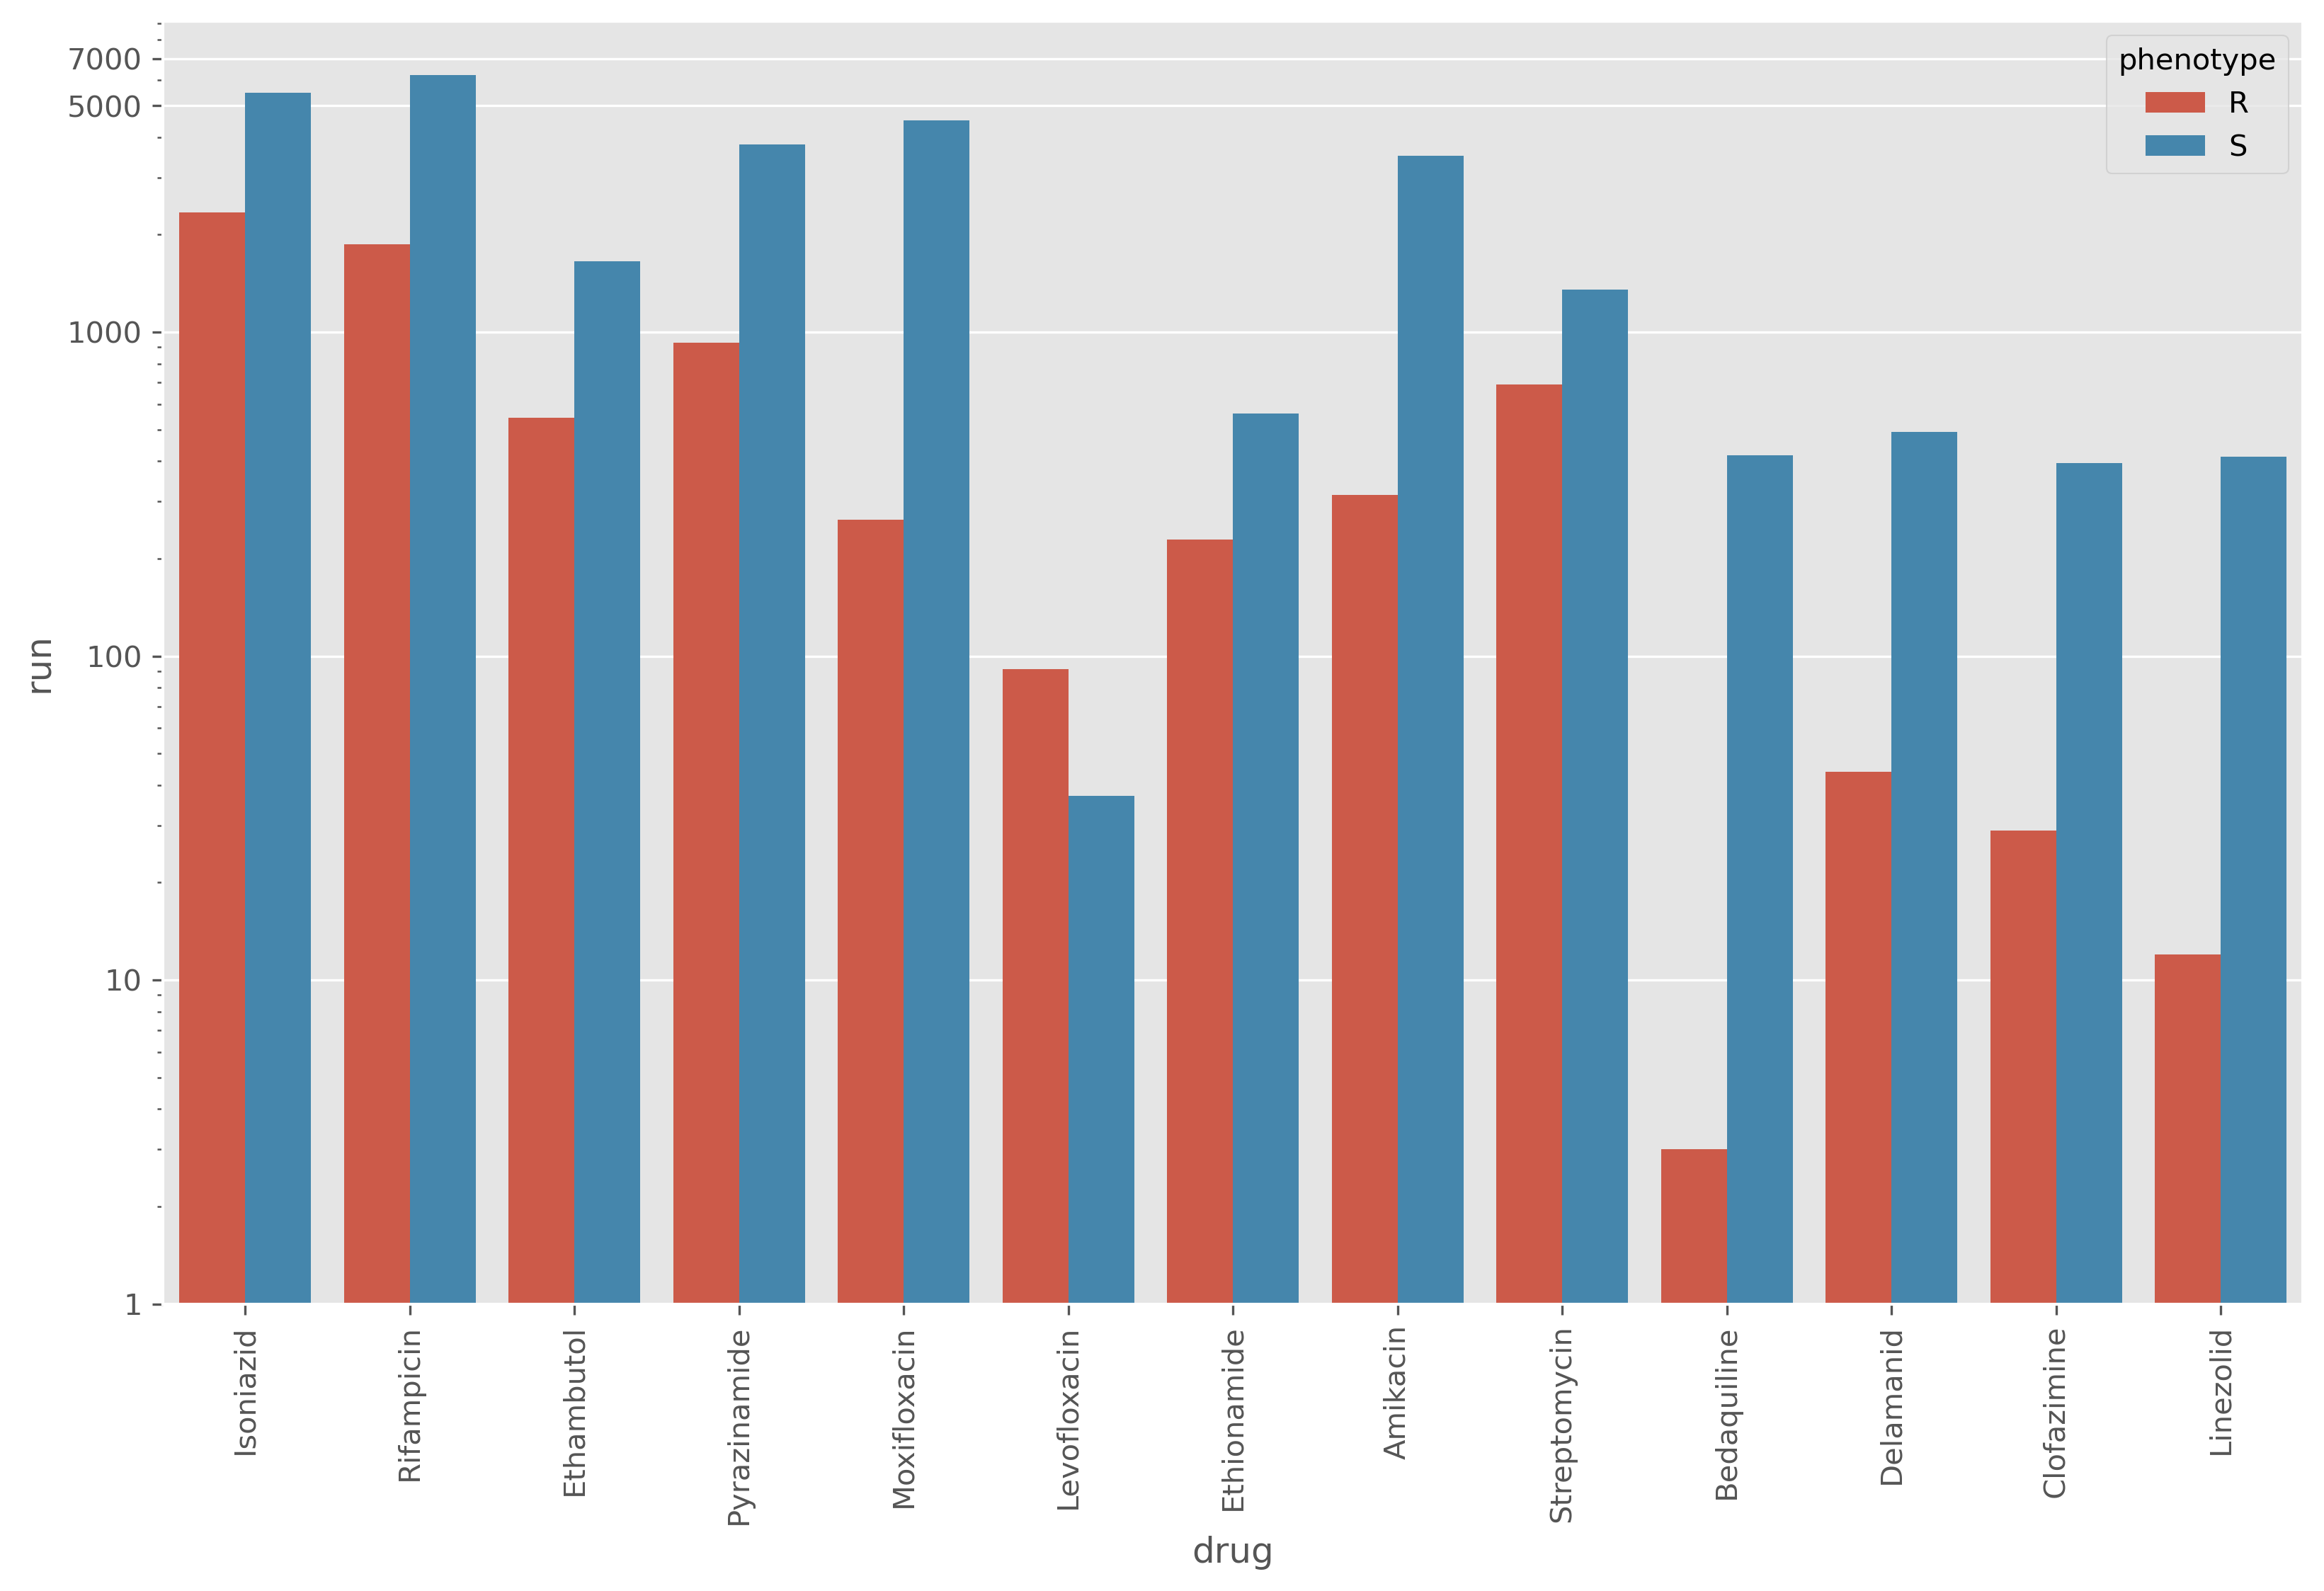

In [673]:
fig, ax = plt.subplots(dpi=300, figsize=(13, 8))
data = pheno_df.dropna()
data = data.query("drug in @who_drugs")
counts = data.groupby(["drug", "phenotype"]).count().reset_index()
counts["drug"] = [s.capitalize() for s in counts["drug"]]
counts.replace("Para-aminosalicylic_acid", "PAS", inplace=True)
sns.barplot(data=counts, x="drug", y="run", hue="phenotype", order=order)
yticks = [1, 10, 100, 1000, 5000, 7000]
ax.set_yscale("log")
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
_ = plt.xticks(rotation=90)

In [674]:
print(counts.to_markdown(index=False))

| drug         | phenotype   |   run |
|:-------------|:------------|------:|
| Amikacin     | R           |   314 |
| Amikacin     | S           |  3504 |
| Bedaquiline  | R           |     3 |
| Bedaquiline  | S           |   416 |
| Clofazimine  | R           |    29 |
| Clofazimine  | S           |   395 |
| Delamanid    | R           |    44 |
| Delamanid    | S           |   493 |
| Ethambutol   | R           |   543 |
| Ethambutol   | S           |  1653 |
| Ethionamide  | R           |   229 |
| Ethionamide  | S           |   562 |
| Isoniazid    | R           |  2338 |
| Isoniazid    | S           |  5495 |
| Levofloxacin | R           |    91 |
| Levofloxacin | S           |    37 |
| Linezolid    | R           |    12 |
| Linezolid    | S           |   412 |
| Moxifloxacin | R           |   264 |
| Moxifloxacin | S           |  4507 |
| Pyrazinamide | R           |   926 |
| Pyrazinamide | S           |  3795 |
| Rifampicin   | R           |  1869 |
| Rifampicin   | S       

In [675]:
d = {}
exclude = set()
samples_with_pheno = []
for drug in map(str.lower, DRUGS):
    if drug not in who_drugs:
        continue
    drug_df = pheno_df.query("drug == @drug").dropna()
    samples = list(drug_df["run"])
    samples_with_pheno.extend(samples)
    if samples:
        d[drug.upper()] = samples

In [353]:
upset_data = upsetplot.from_contents(d)

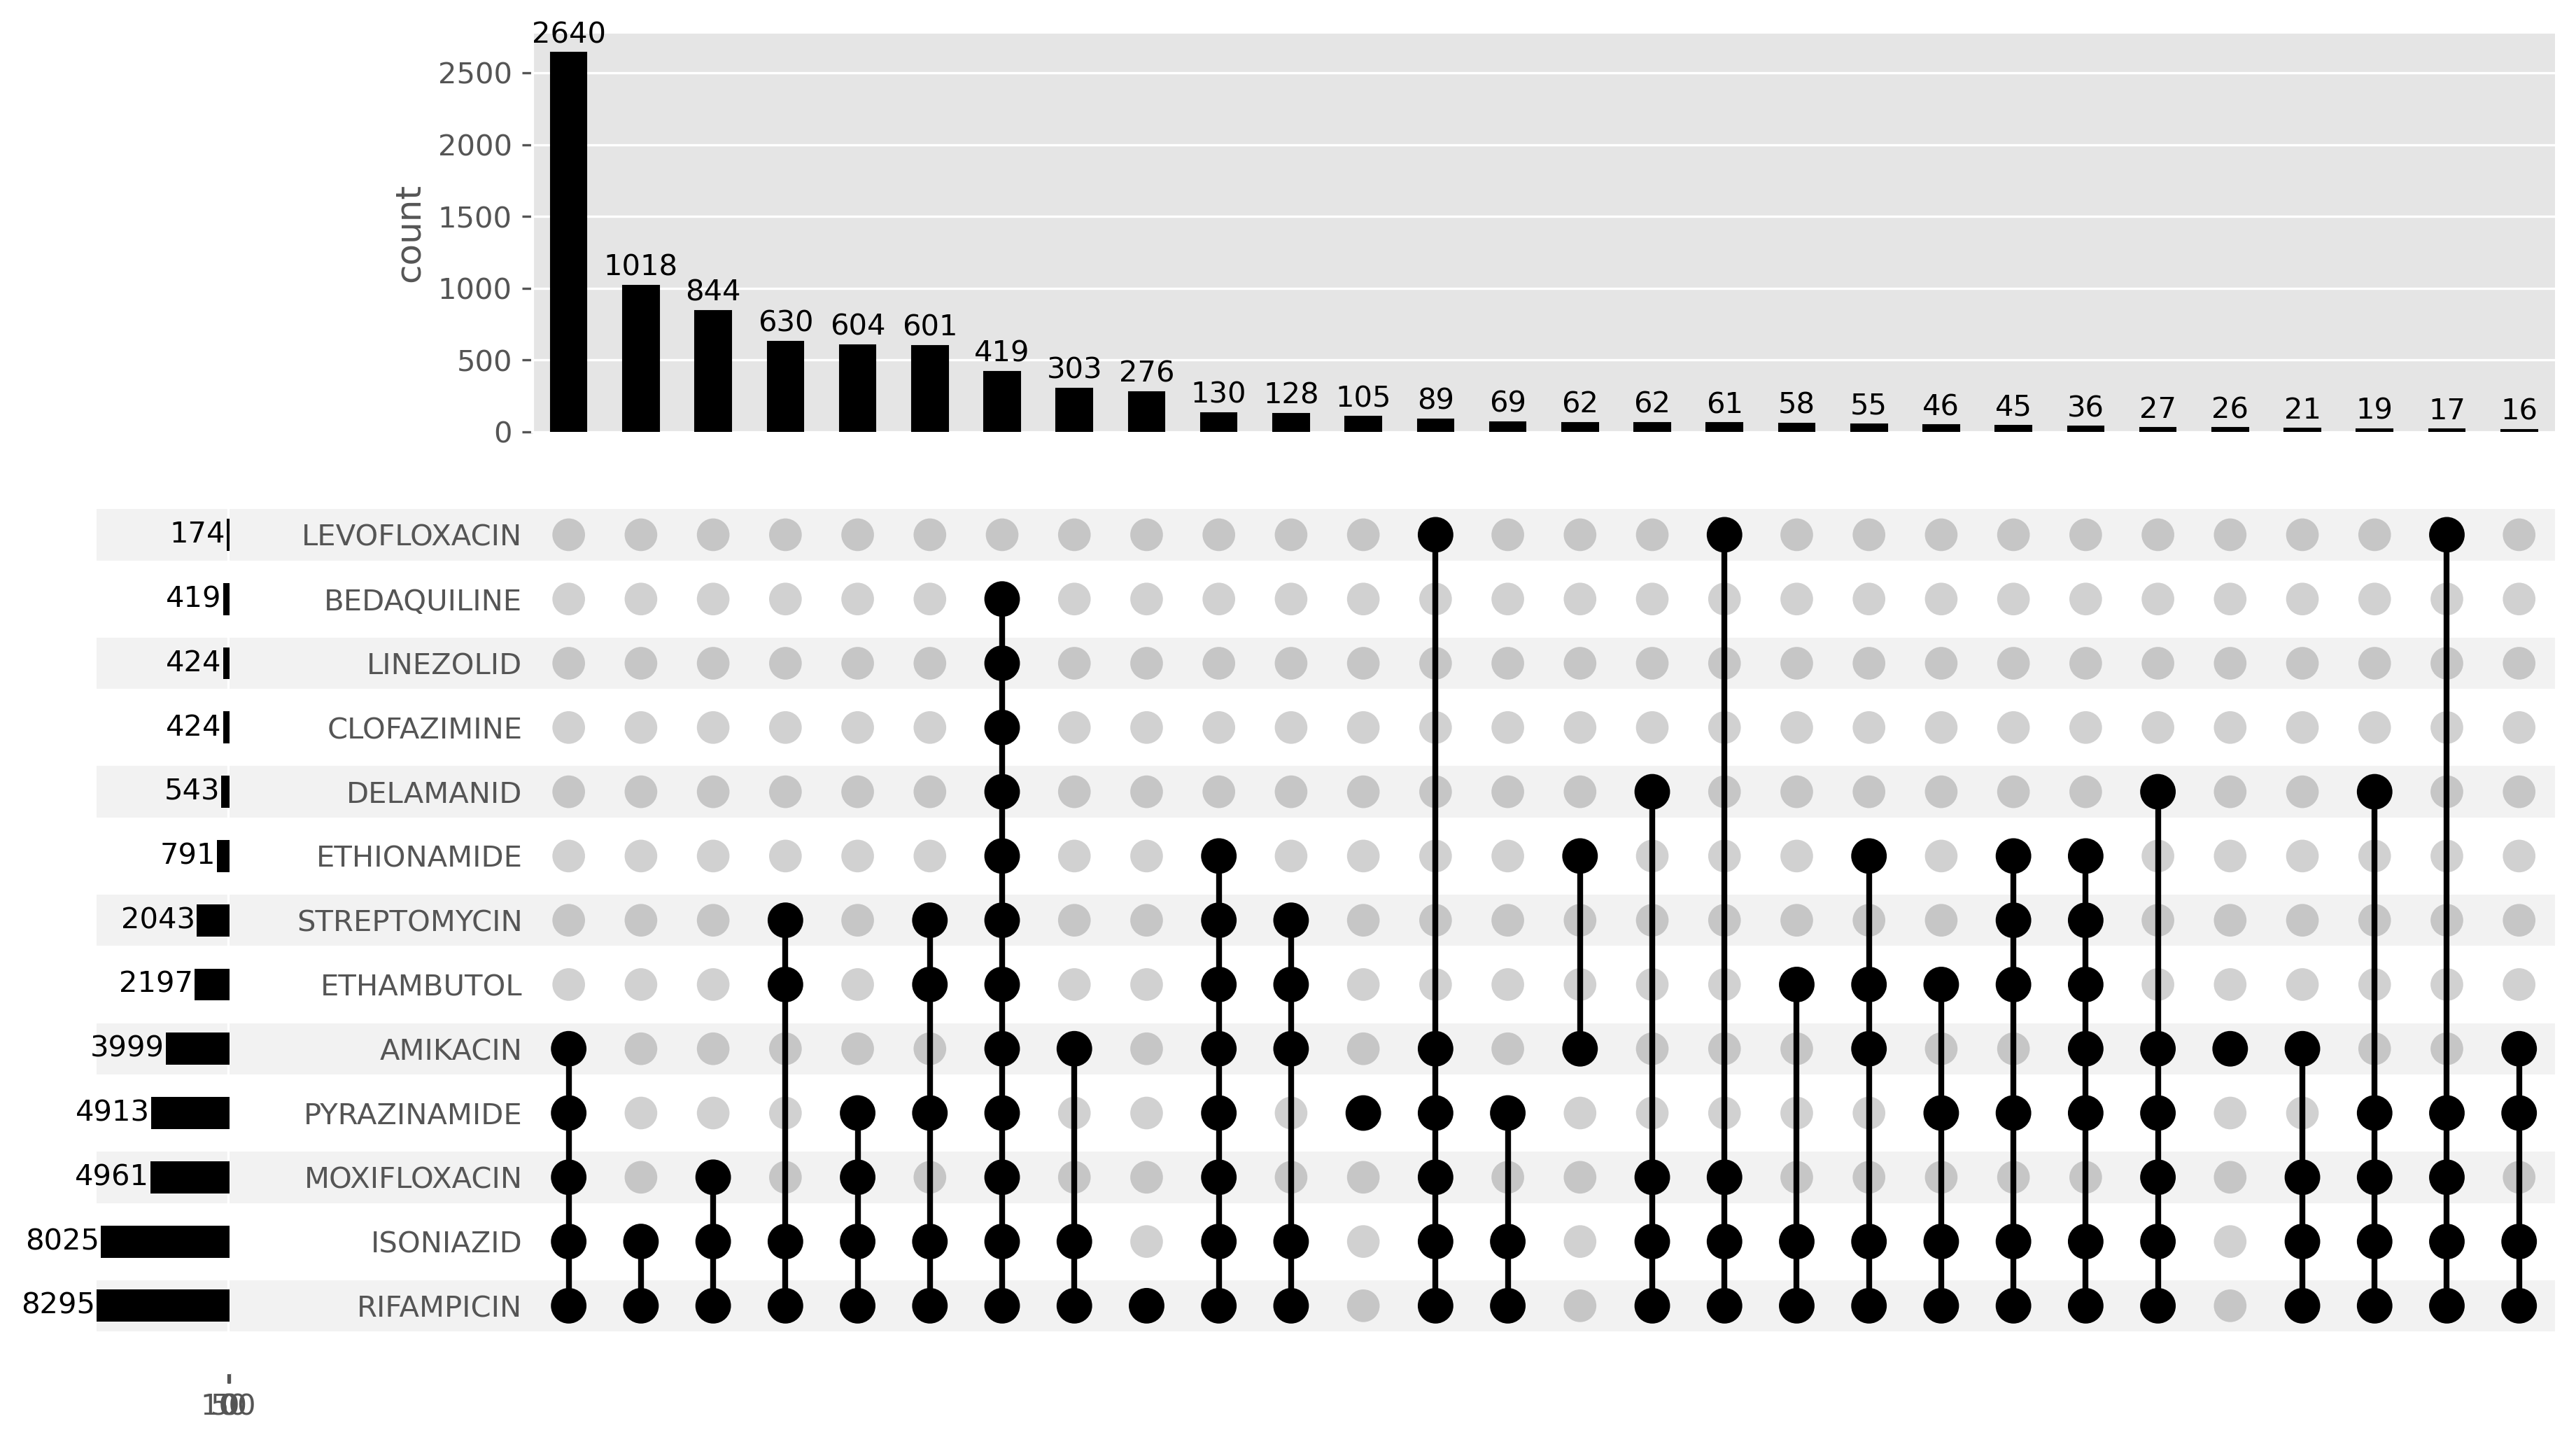

In [354]:
fig, ax = plt.subplots()
p = upsetplot.plot(
    upset_data,
    fig=fig,
    sort_by="cardinality",
    orientation="horizontal",
    show_counts=True,
    min_subset_size=15
)
p["intersections"].set_ylabel("count")
ax.axis("off")
# fig.set_figwidth(8)
# fig.set_figheight(10)
p["totals"].set_xticks([0, 50, 100])
fig.set_dpi(300)

# Convert WHO catalogue into text file

https://github.com/mbhall88/WHO-correspondence/issues/3

The Excel spreadsheet the catalogue is extract from is sheet S4 in https://www.thelancet.com/cms/10.1016/S2666-5247(21)00301-3/attachment/77fc876a-afad-4c17-856e-6cc0d5951c29/mmc2.xlsx - which is included in this repository under `docs/who-catalogue.xlsx`

In [190]:
sheet_name = "S4"
cat = pd.read_excel("../../docs/who-catalogue.xlsx", sheet_name=sheet_name, header=4)

In [191]:
cat.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'algorithm pass', 'Present_SOLO_R', 'Present_SOLO_SR', 'Present_S',
       'Absent_S', 'Present_R', 'Absent_R', 'PPV', 'PPV_lb', 'PPV_ub',
       'PPV | SOLO', 'PPV | SOLO_lb', 'PPV | SOLO_ub', 'Sensitivity',
       'Sensitivity_lb', 'Sensitivity_ub', 'Specificity', 'Specificity_lb',
       'Specificity_ub', 'LR+', 'LR+_lb', 'LR+_ub', 'LR-', 'LR-_lb', 'LR-_ub',
       'OR', 'OR_lb', 'OR_ub', 'OR SOLO', 'OR SOLO_lb', 'OR SOLO_ub',
       'OR SOLO_FE-sig', 'Neutral masked', 'Unnamed: 37', 'Unnamed: 38',
       'Miotto et al. (PMID 29284687)', 'NGS Guide 2018',
       'Level of resistance to INH or MXF', 'RIF CC guide 2021',
       'Hain GenoType MTBDRplus V2.0', 'Nipro Genoscholar NTM+MDRTB II',
       'Cepheid Xpert MTB/RIF', 'Cepheid Xpert MTB/RIF Ultra',
       'Hain GenoType MTBDRsl V2.0', 'Cepheid Xpert MTB/XDR',
       'Nipro Genoscholar PZA-TB II', 'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

In [192]:
cols = {
    'Unnamed: 0': "drug",
    'Unnamed: 1': "tier",
    'Unnamed: 2': "variant",
    'Unnamed: 3': "genome_position",
    'Unnamed: 50': "additional_grading_criteria",
    'Unnamed: 51': "grading",  # FINAL CONFIDENCE GRADING
    'Unnamed: 37': "initial_grading",
    'Unnamed: 38': "dataset",
}
keep_cols = [
    "drug", 
    "variant", 
    "genome_position", 
    "Present_SOLO_R", 
    "Present_SOLO_SR", 
    "Present_S", 
    "Present_R", 
    "Absent_S", 
    "Absent_R",
    "grading"
]
cat = cat.rename(columns=cols).loc[:,keep_cols]

In [193]:
# cat.to_csv("../../docs/who-catalogue-trimmed.tsv.gz", sep="\t")

We remove so called "combo" variants. These variants have a grading of "combo" and the variant column has two variants. There is no information in any documentation I could find that explains the significance of this, or what the impact is on susceptibility.

In [225]:
cat = cat.loc[cat["grading"] != "combo"]

Regular expressions to capture the expected structure of the variants strings as either simple mutations - i.e., SNV of single amino acid change - or indels.

In [226]:
simple_variant_re = re.compile(r"(?P<var>[a-zA-Z\d]+_[acgtA-Z]+-?\d+[acgtA-Z!])")
indel_re = re.compile(r"(?P<indel>[a-zA-Z\d]+_-?\d+_(ins|del)_\d+_[a-z]+_[a-z]+)")

In [227]:
for v in cat["variant"]:
    if simple_variant_re.findall(v) or indel_re.findall(v):
        continue
    print(v)

Given we see nothing printed here, all variants have a substring of the expected format.

Another thing we need to clean up is variants of the form

```
embC_c-4522g (Rv3789_c-33g)
```

These are promotor mutations that extend "backwards" into another gene, with that gene being listed in parentheses. For our purposes, we will remove the mutation in parentheses and maintain the promotor mutation mentioned first.

In [239]:
cat = cat.loc[~cat["variant"].str.contains("\(")]

In [247]:
multiple = 0
for v in cat["variant"]:
    if m := simple_variant_re.findall(v):
        if len(m) > 1:
            multiple += 1
    if m := indel_re.findall(v):
        if len(m) > 1:
            multiple += 1
    if (m := indel_re.findall(v)) and (n := simple_variant_re.findall(v)):
        multiple += 1
print(f"{multiple} variants with multiple matches in the one variant")

0 variants with multiple matches in the one variant


In [248]:
len(cat["variant"])

15730

Now we split the variants into the [Mykrobe-expected, gene coordinates format](https://github.com/Mykrobe-tools/mykrobe/wiki/Custom-Panels#probes-from-gene-coordinates). For example, `embC_c-4522g` becomes

```
embC    C-4522G    DNA
```

and `katG_S315T` becomes

```
katG    S315T    PROT
```

In addition, we'll incorporate the grading to allow for easy filtering downstream and the drug for when we generate the [`var2res.json` file](https://github.com/Mykrobe-tools/mykrobe/wiki/Custom-Panels#resistance-json-file). We choose to use the full drug name to remove any ambiguity (there's a lot of variations out there).

At the same time, we validate the indel information. For example, `whiB7_192_del_1_gc_g` indicates that we have a deletion (`del`) of 1 base - `gc->g`. Let's make sure all of these numbers match the provided reference and alternate.

In [286]:
def parse_variant(s: str) -> Tuple[str, str, str]:
    gene = s.split("_")[0]
    
    if "ins" in s or "del" in s:
        _, pos, _, n, ref, alt = s.split("_")
        actual_n = abs(len(ref)-len(alt))
        diff = actual_n - int(n)
        if diff != 0:
#             print(diff, n, actual_n)
            raise ValueError(f"{s} has a discrepant indel length. Got length {actual_n}")
        mutation = f"{ref}{pos}{alt}".upper()
        alpha = "DNA"
    else:
        mutation = s.split("_")[-1]
        alpha = "DNA" if mutation[0].islower() else "PROT"
        mutation = mutation.upper()
        
    return gene, mutation, alpha

assert parse_variant("rrs_a1401g") == ("rrs", "A1401G", "DNA")
assert parse_variant("whiB6_A77V") == ("whiB6", "A77V", "PROT")
assert parse_variant("whiB7_192_del_1_gc_g") == ("whiB7", "GC192G", "DNA")
assert parse_variant("eis_c-14t") == ("eis", "C-14T", "DNA")

In [287]:
s = """AMI amikacin
BDQ bedaquiline
CAP capreomycin
CFZ clofazimine
DLM delamanid
EMB ethambutol
ETH ethionamide
INH isoniazid
KAN kanamycin
LEV levofloxacin
LZD linezolid
MXF moxifloxacin
PZA pyrazinamide
RIF rifampicin
STM streptomycin"""

drug2abbrev = {drug: abbrev for abbrev, drug in map(str.split, s.splitlines())}
abbrev2drug = {abbrev: drug for abbrev, drug in map(str.split, s.splitlines())}

In [306]:
panel_data = []
errors = []
for i, row in cat.iterrows():
    try:
        gene, mut, alpha = parse_variant(row["variant"])
    except ValueError:
        errors.append(i)
        continue
    # change stop codon to the canonical *
    mut = mut.replace("!", "*")
    drug = abbrev2drug[row["drug"]]
    grading = int(row["grading"][0])
    panel_data.append((gene, mut, alpha, drug, grading))

In [307]:
len(errors)

108

So we have 108 variants that contradict themselves. We'll write those to file.

In [294]:
errdf = cat.loc[errors]
# errdf.to_csv("../../docs/who-catalogue-errors.tsv", index=False, sep="\t")

In [308]:
len(set(panel_data)) == len(panel_data)

True

There are no duplicate rows in the panel data

In [309]:
panel_df = pd.DataFrame(panel_data, columns=["gene", "mutation", "alphabet", "drug", "grading"])

In [311]:
panel_df

,gene,mutation,alphabet,drug,grading
0,rrs,A1401G,DNA,amikacin,1
1,eis,C-14T,DNA,amikacin,1
2,rrs,G1484T,DNA,amikacin,2
3,rrs,C1402T,DNA,amikacin,2
4,whiB6,A77V,PROT,amikacin,3
...,...,...,...,...,...
15617,whiB7,T-100C,DNA,streptomycin,5
15618,gid,Y195H,PROT,streptomycin,5
15619,whiB7,GC192G,DNA,streptomycin,5
15620,rrs,C492T,DNA,streptomycin,5


In [312]:
# panel_df.to_csv("../../docs/who-panel.tsv", sep="\t", index=False)

In [313]:
Counter(cat["grading"])

Counter({'1) Assoc w R': 193,
         '2) Assoc w R - Interim': 997,
         '3) Uncertain significance': 14319,
         '5) Not assoc w R': 191,
         '4) Not assoc w R - Interim': 30})

In [369]:
grade2_panel = pd.read_csv("../../results/panel/who2021/grading_2/panel.tsv", header=None, sep="\t")

In [370]:
grade2_panel.columns = ["gene", "mutation", "alphabet"]

In [375]:
expected_variants = {f"{x}_{y}": z for x, y, z in zip(grade2_panel.gene, grade2_panel.mutation, grade2_panel.alphabet)}
len(expected_variants)

1131

In [358]:
log = Path("../../logs/stderr/construct_who_panel/grade_2.log").read_text()

In [378]:
failed_variants = dict()
for line in log.splitlines():
    if not "All variants failed for" in line:
        continue
    variant = line.split("Gene:")[-1].split()[0]
    failed_variants[variant] = expected_variants[variant]

In [379]:
len(failed_variants)

621

In [380]:
len(failed_variants) / len(expected_variants)

0.5490716180371353

In [381]:
Counter(failed_variants.values())

Counter({'DNA': 621})

In [383]:
Counter(expected_variants.values())

Counter({'DNA': 710, 'PROT': 421})

In [384]:
621/710

0.8746478873239436

So 55% of the variants failed, with that being 87% of the expected DNA variants.

In [623]:
ex_var = list(failed_variants.keys())[0]
ex_var

'ethA_CT111C'

In [606]:
expected_variants[ex_var]

'DNA'

Were all the failed DNA variants on the reverse strand?

In [421]:
annotation = dict()
with open("../../resources/NC_000962.3.gff3") as fp:
    for line in map(str.rstrip, fp):
        if line.startswith("#") or not line:
            continue
        fields = line.split("\t")
        ftr = fields[2]
        if ftr != "gene":
            continue
        d = dict()
        d["strand"] = fields[6]
        d["start"] = int(fields[3]) - 1 # GFF start is 1-based inclusive
        d["end"] = int(fields[4]) # GFF end is 1-based inclusive
        extras = fields[8].split(";")
        gene = ""
        for e in extras:
            if e.startswith("Name=") or e.startswith("gene="):
                gene = e.split("=")[-1]
        if not gene:
            raise ValueError(line)
        annotation[gene] = d

In [422]:
len(annotation)

3978

In [423]:
Counter(annotation[s.split("_")[0]]["strand"] for s in failed_variants)

Counter({'-': 621})

So this means that **all** of the failed variants are transcribed on the reverse strand.

Let's check if they are correct if we consider them with respect to the genome position - i.e., if the gene is transcribed on the reverse strand its start position will be greater than its end position when considered against the reference - which is in the forward frame.

In [466]:
def split_var_name(name):
    items = re.match(r"([A-Z]+)([-0-9]+)([A-Z/\*]+)", name, re.I).groups()
    return items[0], int(items[1]), items[2]

TRANSLATE = str.maketrans("ATGC", "TACG")
def revcomp(s: str) -> str:
    return complement(s)[::-1]

def complement(s: str) -> str:
    return s.upper().translate(TRANSLATE)

In [432]:
h37rv = ""
with open("../../resources/NC_000962.3.fa") as fp:
    _ = next(fp)
    for line in map(str.rstrip, fp):
        h37rv += line
len(h37rv)

4411532

In [624]:
gene = ex_var.split("_")[0]
ref, pos, alt = split_var_name(ex_var.split("_")[-1])
entry = annotation[gene]
entry

{'strand': '-', 'start': 4326003, 'end': 4327473}

In [577]:
seq = h37rv[entry["start"]:entry["end"]]

Check we have the correct sequence by reverse complementing and check it has a Methionine codon (ATG) at the start

In [578]:
revcomp(seq)[:3]

'ATG'

In [625]:
# we expect
ref

'CT'

In [626]:
compseq = complement(seq)
revseq = seq[::-1]
revcompseq = revcomp(seq)

In [636]:
pos = entry["end"] - pos - entry["start"]

In [637]:
seq[pos:pos+len(ref)]

'CT'

In [638]:
revcompseq[pos:pos+len(ref)]

'CC'

In [639]:
compseq[pos:pos+len(ref)]

'GA'

In [640]:
revseq[pos:pos+len(ref)]

'GG'

In [641]:
seq[pos-5:pos] + " " + seq[pos] + " " + seq[pos+1:pos+5]

'TCCCG C TTTT'

In [642]:
revseq[pos-5:pos] + " " + revseq[pos] + " " + revseq[pos+1:pos+5]

'CATGT G GCAC'

In [643]:
compseq[pos-5:pos] + " " + compseq[pos] + " " + compseq[pos+1:pos+5]

'AGGGC G AAAA'

In [644]:
revcompseq[pos-5:pos] + " " + revcompseq[pos] + " " + revcompseq[pos+1:pos+5]

'GTACA C CGTG'

So it appears that the reverse strand variant's position *is* with respect to the correct reading frame, but the sequences have to be reverse complemented. In addition, to allow for the offset this creates on the forward strand, we need to subtract the length of the reference allele minus one from the position in the variant. For example

`ethA_CT111C` becomes `ethA_AG110C` and `pncA_GTC-3GT` becomes `pncA_GAC-5AC`